In [76]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
#import data
data=pd.read_csv('C:/Users/LENOVO/datascience/greatlearning/Project_UnsupervisedLearning/vehicle.csv')

In [3]:
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
#Exploratory Data Ananlysis

In [5]:
data.shape

(846, 19)

In [6]:
#Data type of attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [7]:
#Summarize the presence of null value
print(data.isnull().sum())

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [8]:
#We will drop the null values from the dataset
data=data.dropna()

In [9]:
#Recheck the datasert for presence of na values
print(data.isnull().sum())

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


In [10]:
#check the dimension of new dataset
data.shape

(813, 19)

In [11]:
#Describing the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.656827,8.233751,73.0,87.0,93.0,100.0,119.0
circularity,813.0,44.803198,6.146659,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.043050,15.783070,40.0,70.0,79.0,98.0,112.0
radius_ratio,813.0,169.098401,33.615402,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,813.0,61.774908,7.973000,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,813.0,8.599016,4.677174,2.0,7.0,8.0,10.0,55.0
scatter_ratio,813.0,168.563346,33.082186,112.0,146.0,157.0,198.0,265.0
elongatedness,813.0,40.988930,7.803380,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.558426,2.573184,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,813.0,147.891759,14.504648,118.0,137.0,146.0,159.0,188.0


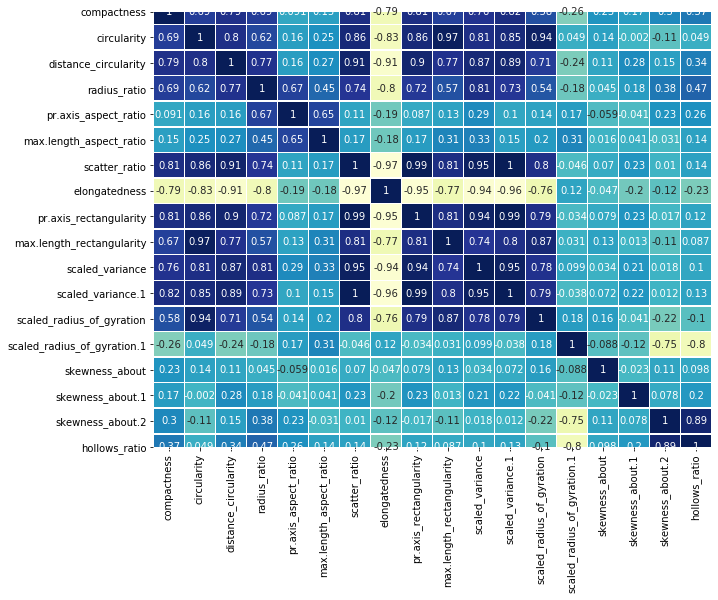

In [12]:
#Coreltion matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [37]:
#as we can see there are lot of corelated columns so we can drop them to reduce the feature space
#we can drop compactness,circularity,distance_circularity,radius_ratio,pr.axis_rectangularity,max.length_regularity,scaled_variance,scaled_radius_of_gyration,
#scaled_radius_of_gyration.1

In [38]:
#Drop the corelated columns
data2=data[['pr.axis_aspect_ratio','max.length_aspect_ratio','elongatedness','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio','class']]

In [39]:
data2.head()

,pr.axis_aspect_ratio,max.length_aspect_ratio,elongatedness,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,72.0,10,42.0,6.0,16.0,187.0,197,van
1,57.0,9,45.0,9.0,14.0,189.0,199,van
2,66.0,10,32.0,14.0,9.0,188.0,196,car
3,63.0,9,46.0,6.0,10.0,199.0,207,van
4,103.0,52,45.0,9.0,11.0,180.0,183,bus


In [40]:
#Rename the column bremoving . from the column name
data3=data2.rename(columns = {'pr.axis_aspect_ratio':'pr_axis_aspect_ratio','max.length_aspect_ratio':'max_length_aspect_ratio','skewness_about.1':'skewness_about_1','skewness_about.2':'skewness_about_2'}, inplace = True)

In [41]:
#check new renamed columns
data2.head()


,pr_axis_aspect_ratio,max_length_aspect_ratio,elongatedness,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
0,72.0,10,42.0,6.0,16.0,187.0,197,van
1,57.0,9,45.0,9.0,14.0,189.0,199,van
2,66.0,10,32.0,14.0,9.0,188.0,196,car
3,63.0,9,46.0,6.0,10.0,199.0,207,van
4,103.0,52,45.0,9.0,11.0,180.0,183,bus


## Univariate Analysis

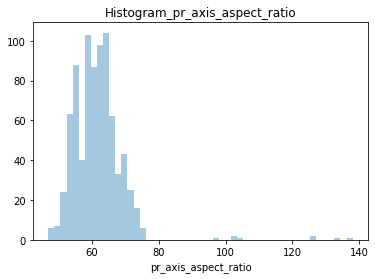

In [19]:
#pr_axis_aspect_ratio
sns.distplot(data2['pr_axis_aspect_ratio'],kde=False)
plt.title('Histogram_pr_axis_aspect_ratio')
plt.show()

In [20]:
data2['pr_axis_aspect_ratio'].describe()

count    813.000000
mean      61.774908
std        7.973000
min       47.000000
25%       57.000000
50%       61.000000
75%       65.000000
max      138.000000
Name: pr_axis_aspect_ratio, dtype: float64

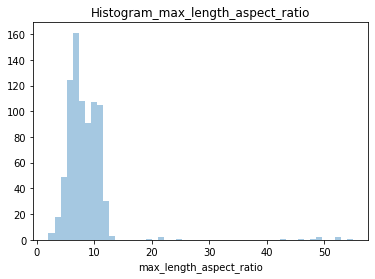

In [21]:
#maxlengthaspectratio
sns.distplot(data2['max_length_aspect_ratio'],kde=False)
plt.title('Histogram_max_length_aspect_ratio')
plt.show()

In [22]:
data2['max_length_aspect_ratio'].describe()

count    813.000000
mean       8.599016
std        4.677174
min        2.000000
25%        7.000000
50%        8.000000
75%       10.000000
max       55.000000
Name: max_length_aspect_ratio, dtype: float64

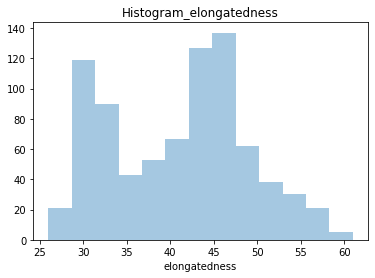

In [23]:
#elongatedness
sns.distplot(data2['elongatedness'],kde=False)
plt.title('Histogram_elongatedness')
plt.show()

In [24]:
data2['elongatedness'].describe()

count    813.00000
mean      40.98893
std        7.80338
min       26.00000
25%       33.00000
50%       43.00000
75%       46.00000
max       61.00000
Name: elongatedness, dtype: float64

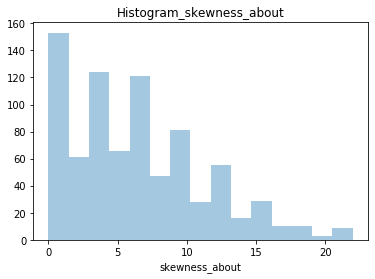

In [29]:
#skewness_about
sns.distplot(data2['skewness_about'],kde=False)
plt.title('Histogram_skewness_about')
plt.show()

In [30]:
data2['skewness_about'].describe()

count    813.000000
mean       6.351784
std        4.921476
min        0.000000
25%        2.000000
50%        6.000000
75%        9.000000
max       22.000000
Name: skewness_about, dtype: float64

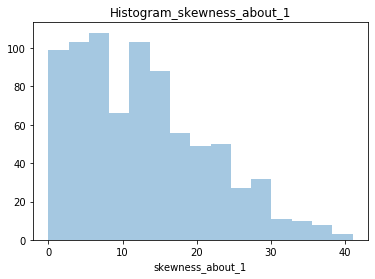

In [31]:
#skewness_about_1
sns.distplot(data2['skewness_about_1'],kde=False)
plt.title('Histogram_skewness_about_1')
plt.show()

In [32]:
data2['skewness_about_1'].describe()

count    813.000000
mean      12.687577
std        8.926951
min        0.000000
25%        6.000000
50%       11.000000
75%       19.000000
max       41.000000
Name: skewness_about_1, dtype: float64

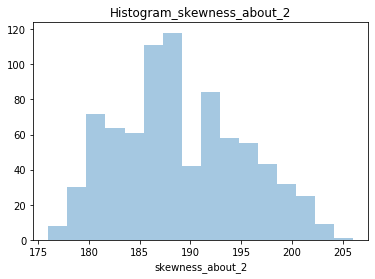

In [33]:
#skewness_about_2
sns.distplot(data2['skewness_about_2'],kde=False)
plt.title('Histogram_skewness_about_2')
plt.show()

In [34]:
data2['skewness_about_2'].describe()

count    813.000000
mean     188.979090
std        6.153681
min      176.000000
25%      184.000000
50%      189.000000
75%      193.000000
max      206.000000
Name: skewness_about_2, dtype: float64

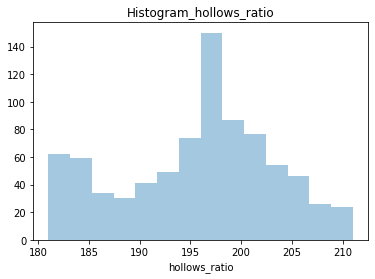

In [42]:
#hollows_ratio
sns.distplot(data2['hollows_ratio'],kde=False)
plt.title('Histogram_hollows_ratio')
plt.show()

In [43]:
data2['hollows_ratio'].describe()

count    813.000000
mean     195.729397
std        7.398781
min      181.000000
25%      191.000000
50%      197.000000
75%      201.000000
max      211.000000
Name: hollows_ratio, dtype: float64

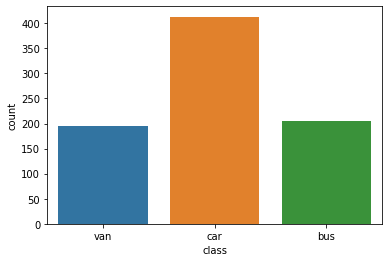

In [44]:
#class
sns.countplot(data2['class'])

In [45]:
data2['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

In [83]:
#As the target feature is categorical we ned to encode it
#we will use label encoder
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data3_encoded=data2.apply(LabelEncoder().fit_transform)

In [63]:
data3_encoded.head()

,pr_axis_aspect_ratio,max_length_aspect_ratio,elongatedness,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
0,25,8,16,6,16,11,16,2
1,10,7,19,9,14,13,18,2
2,19,8,6,14,9,12,15,1
3,16,7,20,6,10,23,26,2
4,32,19,19,9,11,4,2,0


In [64]:
#dropping the target column and assigning to new variable Y
X = data3_encoded.drop('class', axis=1)
Y=data3_encoded['class']

In [65]:
Y.value_counts()

1    413
0    205
2    195
Name: class, dtype: int64

In [87]:
#so 1->car,0->bus,2->van

In [66]:
#making list of columns to use later
col_names = list(X.columns)

In [67]:
#We can see that data are not scaled we will scale with feature scaling
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [95]:
X_scaled_df = pd.DataFrame(X_scaled, columns=col_names)

In [96]:
X_scaled_df.head()

,pr_axis_aspect_ratio,max_length_aspect_ratio,elongatedness,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio
0,1.781476,0.710083,0.129857,-0.071523,0.373573,-0.321782,0.171837
1,-0.744111,0.298609,0.514694,0.538425,0.148682,0.003602,0.442318
2,0.771241,0.710083,-1.152934,1.555006,-0.413544,-0.159090,0.036596
3,0.266124,0.298609,0.642973,-0.071523,-0.301099,1.630520,1.524243
4,2.960083,5.236290,0.514694,0.538425,-0.188654,-1.460624,-1.721531


In [70]:
#We have now X_scaled and Y consisting the features and target feature

In [97]:
#Splitting the data into training and test set in the ratio of 70:30 respectively
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.3, random_state=7)
# 7 is just any random seed number

In [72]:
#SVM
from sklearn import svm
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
#Test the prediction
predict_svm = svm_classifier.predict(x_test)

In [111]:
# print classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_svm))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        63
           1       0.89      0.79      0.84       129
           2       0.82      0.94      0.87        52

    accuracy                           0.83       244
   macro avg       0.81      0.85      0.83       244
weighted avg       0.83      0.83      0.83       244



In [74]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test,predict_svm)
print(cm_svm)
print("accuracy score of first model ",svm_classifier.score(x_test,y_test))

[[ 51  12   0]
 [ 16 102  11]
 [  2   1  49]]
accuracy score of first model  0.8278688524590164


In [79]:
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [80]:
#Grid search for fine tune
from sklearn.svm import SVC

svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [86]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(x_test)


Best score for training data: 0.8927650985871759 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [85]:
# print classification report 

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        63
           1       0.90      0.81      0.85       129
           2       0.83      0.94      0.88        52

    accuracy                           0.85       244
   macro avg       0.84      0.87      0.85       244
weighted avg       0.85      0.85      0.85       244



In [88]:
#In the above as we recall the numbers are 1->car,0->bus,2->van

In [98]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaled)

array([[-0.89132008,  0.63465884,  0.79609706, ...,  0.19412099,
         1.43485319, -0.20324501],
       [ 0.03804276, -0.31527497, -0.81457937, ..., -0.74753863,
         0.01182992, -0.20866734],
       [-0.93654933,  0.87991651, -0.29599654, ...,  0.64517076,
         0.08324363, -0.07484607],
       ...,
       [-1.38170878,  1.43329668,  1.46923843, ..., -0.41935824,
        -0.60692486, -0.46475477],
       [ 0.6441462 , -0.54112517, -0.31617301, ..., -0.4998779 ,
         0.50661595,  0.21992874],
       [ 2.20771281, -1.12383452, -0.18816979, ..., -0.4147677 ,
         0.49285795,  0.04132785]])

In [99]:
pca.get_covariance()

array([[ 1.00123153,  0.28688953, -0.28216071, -0.05855663, -0.03968656,
         0.35055899,  0.37238871],
       [ 0.28688953,  1.00123153, -0.41766896,  0.07526775,  0.11081955,
         0.03222987,  0.32897677],
       [-0.28216071, -0.41766896,  1.00123153, -0.04687817, -0.20153673,
        -0.11772052, -0.2335154 ],
       [-0.05855663,  0.07526775, -0.04687817,  1.00123153, -0.02282908,
         0.11069407,  0.0982493 ],
       [-0.03968656,  0.11081955, -0.20153673, -0.02282908,  1.00123153,
         0.07786634,  0.20093505],
       [ 0.35055899,  0.03222987, -0.11772052,  0.11069407,  0.07786634,
         1.00123153,  0.89522517],
       [ 0.37238871,  0.32897677, -0.2335154 ,  0.0982493 ,  0.20093505,
         0.89522517,  1.00123153]])

In [100]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.34858139, 0.18436706, 0.1491321 , 0.14490421, 0.08664649,
       0.07905321, 0.00731554])

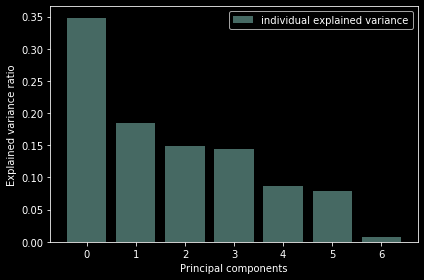

In [101]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [102]:
#Thus we can see from the above plot that first two components constitute almost 55% of the variance.
#Third,fourth and fifth components has 42% of the data sprad.
#The last component has less than 5% of the variance.Hence we can drop the sixth component

In [103]:
pca=PCA(n_components=6)
X_new=pca.fit_transform(X_scaled)
X_new

array([[-0.89132008,  0.63465884,  0.79609706,  0.06058883,  0.19412099,
         1.43485319],
       [ 0.03804276, -0.31527497, -0.81457937,  0.22037316, -0.74753863,
         0.01182992],
       [-0.93654933,  0.87991651, -0.29599654,  1.69594532,  0.64517076,
         0.08324363],
       ...,
       [-1.38170878,  1.43329668,  1.46923843,  0.60460249, -0.41935824,
        -0.60692486],
       [ 0.6441462 , -0.54112517, -0.31617301, -2.05068765, -0.4998779 ,
         0.50661595],
       [ 2.20771281, -1.12383452, -0.18816979, -1.57485514, -0.4147677 ,
         0.49285795]])

In [104]:
pca.get_covariance()

array([[ 1.00123153,  0.28688953, -0.28216071, -0.05855663, -0.03968656,
         0.35055899,  0.37238871],
       [ 0.28688953,  1.00123153, -0.41766896,  0.07526775,  0.11081955,
         0.03222987,  0.32897677],
       [-0.28216071, -0.41766896,  1.00123153, -0.04687817, -0.20153673,
        -0.11772052, -0.2335154 ],
       [-0.05855663,  0.07526775, -0.04687817,  1.00123153, -0.02282908,
         0.11069407,  0.0982493 ],
       [-0.03968656,  0.11081955, -0.20153673, -0.02282908,  1.00123153,
         0.07786634,  0.20093505],
       [ 0.35055899,  0.03222987, -0.11772052,  0.11069407,  0.07786634,
         1.00123153,  0.89522517],
       [ 0.37238871,  0.32897677, -0.2335154 ,  0.0982493 ,  0.20093505,
         0.89522517,  1.00123153]])

In [105]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.34858139, 0.18436706, 0.1491321 , 0.14490421, 0.08664649,
       0.07905321])

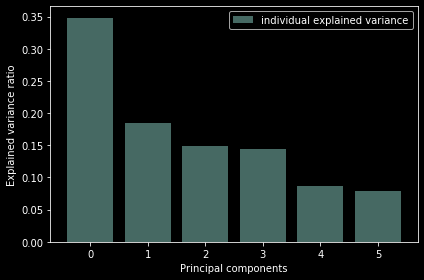

In [107]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(6), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

# new code

In [117]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_scaled.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00123153  0.28688953 -0.28216071 -0.05855663 -0.03968656  0.35055899
   0.37238871]
 [ 0.28688953  1.00123153 -0.41766896  0.07526775  0.11081955  0.03222987
   0.32897677]
 [-0.28216071 -0.41766896  1.00123153 -0.04687817 -0.20153673 -0.11772052
  -0.2335154 ]
 [-0.05855663  0.07526775 -0.04687817  1.00123153 -0.02282908  0.11069407
   0.0982493 ]
 [-0.03968656  0.11081955 -0.20153673 -0.02282908  1.00123153  0.07786634
   0.20093505]
 [ 0.35055899  0.03222987 -0.11772052  0.11069407  0.07786634  1.00123153
   0.89522517]
 [ 0.37238871  0.32897677 -0.2335154   0.0982493   0.20093505  0.89522517
   1.00123153]]
Eigenvectors 
[[ 0.39491724  0.03446289 -0.60954856 -0.42480257  0.06420131 -0.52564986
  -0.10206092]
 [ 0.33540337 -0.23176376 -0.14022843  0.68797694  0.53488565 -0.04675735
  -0.22918322]
 [-0.33488359 -0.01468396 -0.59562752  0.47869937 -0.54798083 -0.02585339
   0.05254276]
 [ 0.08751067  0.02305509 -0.21543499 -0.20357752 -0.09586166  0.61022397

In [118]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 34.85813923  53.29484523  68.20805568  82.69847658  91.36312572
  99.26844625 100.        ]


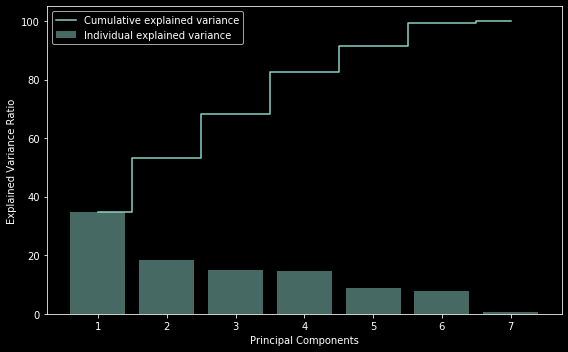

In [124]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
    plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Principal Components')
    plt.legend(loc = 'best')
    plt.tight_layout()
    plt.show()

In [134]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]

[(2.4430747578851926,
  array([ 0.39491724,  0.33540337, -0.33488359,  0.08751067,  0.16760212,
          0.50341842,  0.57464705])),
 (1.2921587915875012,
  array([ 0.06420131,  0.53488565, -0.54798083, -0.09586166,  0.2464059 ,
         -0.50531385, -0.29025012])),
 (1.045210352688928,
  array([-0.52564986, -0.04675735, -0.02585339,  0.61022397,  0.5838699 ,
          0.03498312,  0.07960156])),
 (1.0155786374716138,
  array([-0.10206092, -0.22918322,  0.05254276, -0.7227666 ,  0.63030516,
          0.07968677,  0.09094916])),
 (0.6072723921027892,
  array([-0.42480257,  0.68797694,  0.47869937, -0.20357752, -0.12619953,
         -0.00804914,  0.24421816]))]

In [137]:
# generating dimensionally reduced datasets
w = np.hstack((eigen_pairs[0][1].reshape(7,1), 
                      eigen_pairs[1][1].reshape(7,1)))
print('Matrix W:\n', w)
X_train_sd_pca = x_train.dot(w)
X_test_sd_pca = x_test.dot(w)

Matrix W:
 [[ 0.39491724  0.06420131]
 [ 0.33540337  0.53488565]
 [-0.33488359 -0.54798083]
 [ 0.08751067 -0.09586166]
 [ 0.16760212  0.2464059 ]
 [ 0.50341842 -0.50531385]
 [ 0.57464705 -0.29025012]]


In [138]:
x_train.shape, w.shape, X_train_sd_pca.shape, X_test_sd_pca.shape

((569, 7), (7, 2), (569, 2), (244, 2))

In [141]:
#SVM with PCA
from sklearn.svm import SVC

clf_pca = SVC()
clf_pca.fit(x_train, y_train)
print ('Before PCA score', clf_pca.score(x_test, y_test))

clf_pca.fit(X_train_sd_pca, y_train)
print ('After PCA score', clf_pca.score(X_test_sd_pca, y_test))


Before PCA score 0.9098360655737705
After PCA score 0.6188524590163934
